In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv


Load the dataset and separate the target (ground-truth/label) column from the features (attributes/variables)

In [2]:
# Load dataset. No need to specify column names since it is part of the data
dataset = pd.read_csv('/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')
# Select all the features by dropping the target column
features = dataset.drop('condition', axis=1)
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [3]:
# Select the target column by name
targets = dataset['condition']
# Select the target column by dropping the feature column names
targets = dataset.drop(features.columns, axis=1)
targets.head()

,condition
0,0
1,0
2,0
3,1
4,0


What are the features and the features types?


In [4]:
# Show all names and type info of the columns (can also be used to count the number of missing values)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.3 KB


Show statistics for all the columns using both text and visual plots and discuss what you see. You should use at least two different types of relevant visual plotting techniques. Things to consider are:
how is the data distributed?
are there any outliers? 

In [5]:
# Beging the distribution and outlier investigation by printing simple statistics
features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000


In [6]:
# Based on the statistics and data documentation, we convert categorical (classes) types into category type
# Individually
#features['sex'] = features['sex'].astype('category')
#features['cp'] = features['cp'].astype('category')
# All at once
features[['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal', 'exang']] = features[['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal', 'exang']].astype('category')

# We'll do the same with the combined dataset, which we'll need later
dataset[['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal', 'exang', 'condition']] = dataset[['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal', 'exang','condition']].astype('category')

# Show type information
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    int64   
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    int64   
 4   chol      297 non-null    int64   
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    int64   
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    int64   
 12  thal      297 non-null    category
dtypes: category(7), float64(1), int64(5)
memory usage: 17.0 KB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>]], dtype=object)

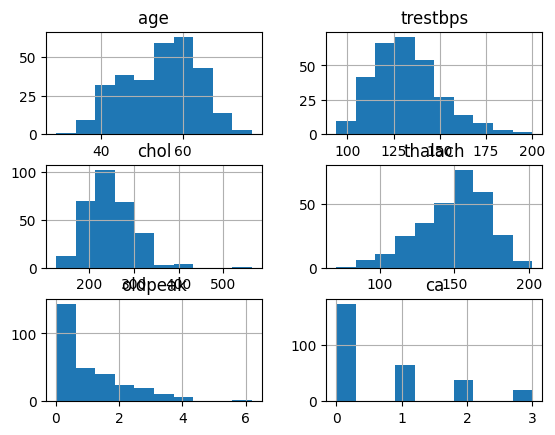

In [7]:
# First relevant plotting technique is histogram (could also use kde). Can be used both to investigate distributions 
# outliers
features.hist()

<Axes: >

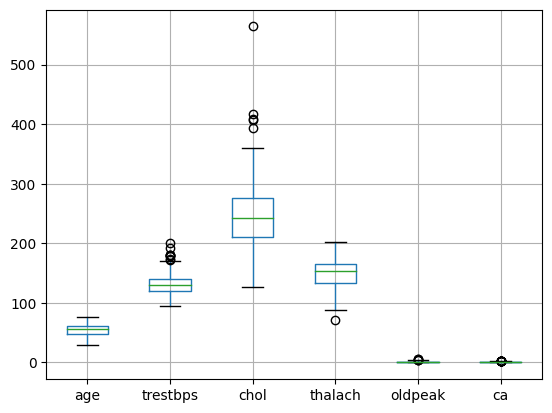

In [8]:
# Second technique is boxplot. More suited for outlier investigations, but also for distributions
features.boxplot()

<Axes: >

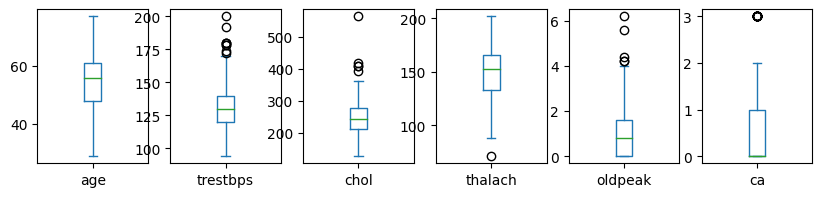

In [9]:
# To fix the problem of scaling on the Y axis, we plot the features individually
import matplotlib.pyplot as plt

figure, axs = plt.subplots(1, 6, figsize=(10,2))

features['age'].plot.box(ax=axs[0])
features['trestbps'].plot.box(ax=axs[1])
features['chol'].plot.box(ax=axs[2])
features['thalach'].plot.box(ax=axs[3])
features['oldpeak'].plot.box(ax=axs[4])
features['ca'].plot.box(ax=axs[5])

Are there any empty values? Count the number in each column. 

In [10]:
# Count the number of missing values
features.isna().sum()
# Show non-null information for all features
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    int64   
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    int64   
 4   chol      297 non-null    int64   
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    int64   
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    int64   
 12  thal      297 non-null    category
dtypes: category(7), float64(1), int64(5)
memory usage: 17.0 KB


How do the features correlate? Discuss all significant findings

In [11]:
# Show correlation matrix
#features.corr()
# Show the correlation matrix using colors. Can also be achieved through seaborn
correlation = features.corr()
correlation.style.background_gradient(cmap='coolwarm', axis=None)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809


<Axes: xlabel='slope', ylabel='thalach'>

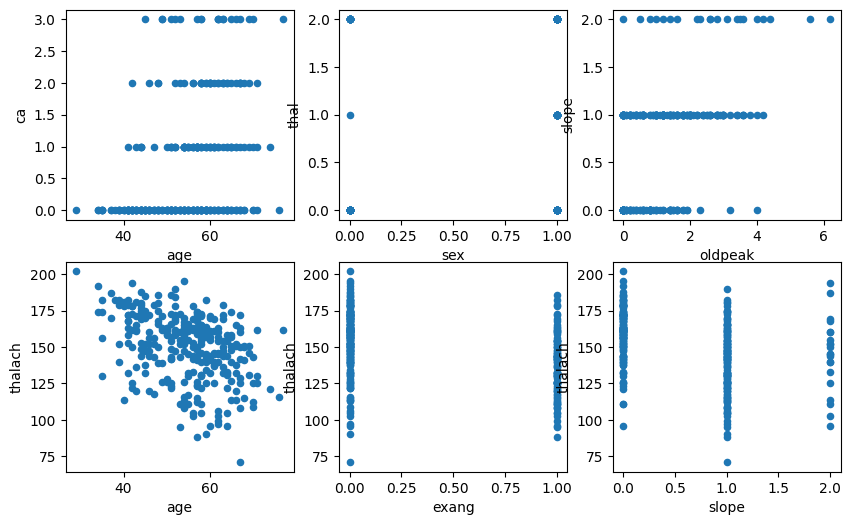

In [12]:
# Investigate further the most correlated features
figure, axs = plt.subplots(2,3, figsize=(10,6))
features.plot.scatter('age','ca',ax=axs[0][0])
features.plot.scatter('sex','thal',ax=axs[0][1])
features.plot.scatter('oldpeak','slope',ax=axs[0][2])
features.plot.scatter('age','thalach',ax=axs[1][0])
features.plot.scatter('exang','thalach',ax=axs[1][1])
features.plot.scatter('slope','thalach',ax=axs[1][2])

What is the class distribution of the target? Find both the counts and the percentages. 

In [13]:
# Count the 
targets.value_counts()
targets.value_counts()/len(targets)

condition
0            0.538721
1            0.461279
Name: count, dtype: float64

Split the data into train/validation/test sets using sensible splits. The choice of sampling strategy and percentages of the splits must be explained/defended. What are the number of instances in each split?
What is the distribution of the target in each split?

In [14]:
# I started with a 60/20/20 split. Based on the investigation below I also tried 50/25/25 (the current setup). 
# This seems to give marginally better distribution in the features.  

# We'll use stratified sampling, because we have a slight imbalance between the classes and a limited 
# amount of instances.
train = dataset.groupby('condition', group_keys=False).apply(lambda x: x.sample(frac=0.5))
val_test = dataset.drop(train.index)
val = val_test.groupby('condition', group_keys=False).apply(lambda x: x.sample(frac=0.5))
test = val_test.drop(val.index)

# the number of instances in each partition
print(f"({len(train)}, {len(val)}, {len(test)})")

# The distribution of the target class (should be the same since we have used stratified sampling)
print(f"{train['condition'].value_counts()/len(train)}")
print(f"{val['condition'].value_counts()/len(val)}")
print(f"{test['condition'].value_counts()/len(test)}")

(148, 74, 75)
condition
0    0.540541
1    0.459459
Name: count, dtype: float64
condition
0    0.540541
1    0.459459
Name: count, dtype: float64
condition
0    0.533333
1    0.466667
Name: count, dtype: float64


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>]], dtype=object)

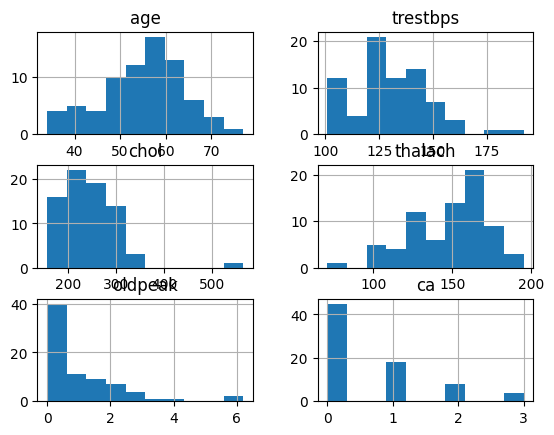

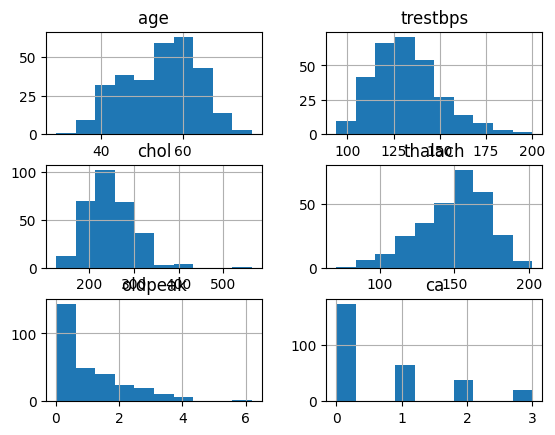

In [15]:
# See if we have enough test data to be valid test (feature distribution comparison)
test.hist()
features.hist()

Based on the findings suggest a processing setup that fits. Things to consider:
How do we handle missing data (if any)?
Should we normalize our data, and what strategy is best suited?
In what way should we deal with our outliers (if any)?
Are there any features that should be removed?

In [16]:
# No missing data. 
# We should normalize the numeric features using mean normalization. Minmax could also work for the features (old peak and ca), but mean normalization should do the trick
# The outliers should be left unchanged (we could remove instance/truncate values if we knew that the measurment was wrong)
# All features are relatively independent, so no features should be removed/combined

Reduce the dimensionality (the number of features) to a suitable number of components based on your findings from the exploratory analysis above 

In [17]:
# There is no need for PCA, but the following shows how this can be done to reduce the number of 
# numerical features by one

num_features = features[['age','trestbps','chol','thalach','oldpeak','ca']]

# Normalize
num_features = (num_features-num_features.mean())/num_features.std()

from sklearn.decomposition import PCA

# Create Principle Component Analysis object, and fit and transform the features
pca = PCA(5)
reduced_features = pd.DataFrame(pca.fit_transform(num_features))

reduced_features.head()


,0,1,2,3,4
0,1.436431,0.700022,-0.719723,-1.839104,0.242581
1,1.825824,0.050419,-0.012815,-0.297842,1.095435
2,1.835049,-0.527181,-1.275842,-0.519135,-1.350719
3,0.637725,1.134400,0.089965,0.106868,0.574203
4,0.089541,-1.105395,0.270327,-0.422054,-0.676243
